In [1]:
# TensorFlow and tf.keras
import tensorflow as tf 
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)

2.6.2
1.19.5


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images,train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

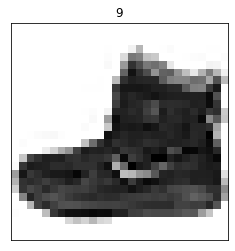

In [7]:
plt.imshow(train_images[0],cmap='gray_r')
plt.title(train_labels[0])
plt.xticks([])
plt.yticks([])
plt.show()

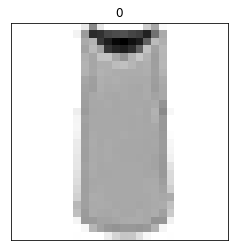

In [8]:
plt.imshow(train_images[2],cmap='gray_r')
plt.title(train_labels[2])
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [11]:
class_names[9]

'Ankle boot'

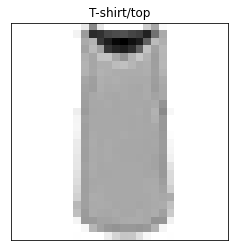

In [12]:
plt.imshow(train_images[2],cmap='gray_r')
plt.title(class_names[train_labels[2]])
plt.xticks([])
plt.yticks([])
plt.show()

In [13]:
train_labels[2]

0

In [14]:
class_names[train_labels[2]]

'T-shirt/top'

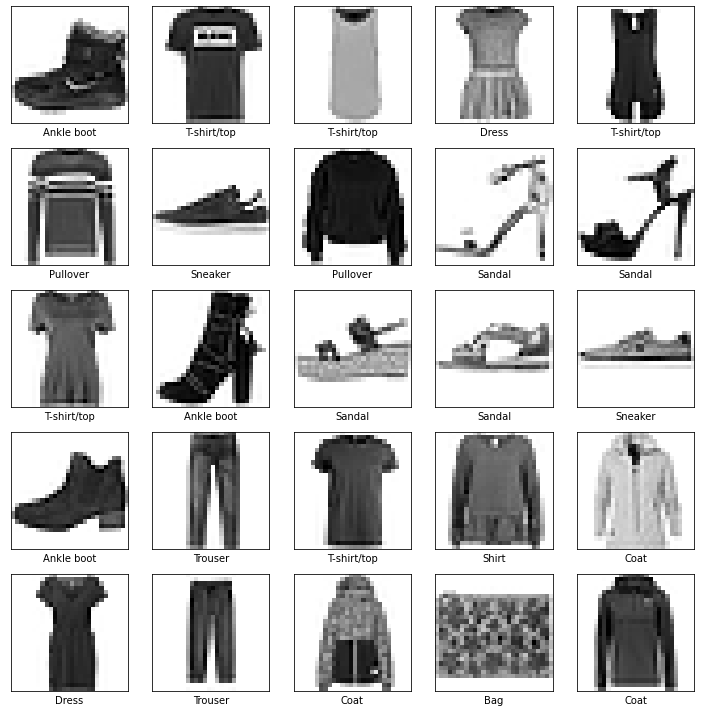

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.show()

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [17]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10,'softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
history = model.fit(train_images, train_labels,validation_split=0.2, epochs=50,verbose=1)

Epoch 1/50
1500/1500 [==============================] - 14s 8ms/step - loss: 0.4987 - accuracy: 0.8227 - val_loss: 0.4347 - val_accuracy: 0.8378
Epoch 2/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3696 - accuracy: 0.8649 - val_loss: 0.3634 - val_accuracy: 0.8668
Epoch 3/50
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3306 - accuracy: 0.8787 - val_loss: 0.3332 - val_accuracy: 0.8804
Epoch 4/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3052 - accuracy: 0.8874 - val_loss: 0.3396 - val_accuracy: 0.8765
Epoch 5/50
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2840 - accuracy: 0.8942 - val_loss: 0.3244 - val_accuracy: 0.8839
Epoch 6/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2721 - accuracy: 0.8990 - val_loss: 0.3198 - val_accuracy: 0.8864
Epoch 7/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2575 - accuracy: 0.9043 - val_loss: 0.3117 - val_a

In [22]:
history.history

{'loss': [0.4986981749534607,
  0.36962181329727173,
  0.33063748478889465,
  0.3052012622356415,
  0.28395897150039673,
  0.27205193042755127,
  0.2574706971645355,
  0.2450733780860901,
  0.23365750908851624,
  0.22402073442935944,
  0.21518190205097198,
  0.2076580971479416,
  0.2005414217710495,
  0.1891546994447708,
  0.18549974262714386,
  0.1770263910293579,
  0.16963200271129608,
  0.16781169176101685,
  0.16185890138149261,
  0.1575527787208557,
  0.15062247216701508,
  0.14653927087783813,
  0.14242254197597504,
  0.13943764567375183,
  0.13355188071727753,
  0.13170737028121948,
  0.1264694184064865,
  0.1237778514623642,
  0.1186983734369278,
  0.11923882365226746,
  0.11385615915060043,
  0.11199184507131577,
  0.10862244665622711,
  0.10519447177648544,
  0.10465315729379654,
  0.10106704384088516,
  0.09678438305854797,
  0.09994914382696152,
  0.09236407279968262,
  0.089681476354599,
  0.08920126408338547,
  0.08983217179775238,
  0.08562794327735901,
  0.0827127918601

In [23]:
history.history['loss']

[0.4986981749534607,
 0.36962181329727173,
 0.33063748478889465,
 0.3052012622356415,
 0.28395897150039673,
 0.27205193042755127,
 0.2574706971645355,
 0.2450733780860901,
 0.23365750908851624,
 0.22402073442935944,
 0.21518190205097198,
 0.2076580971479416,
 0.2005414217710495,
 0.1891546994447708,
 0.18549974262714386,
 0.1770263910293579,
 0.16963200271129608,
 0.16781169176101685,
 0.16185890138149261,
 0.1575527787208557,
 0.15062247216701508,
 0.14653927087783813,
 0.14242254197597504,
 0.13943764567375183,
 0.13355188071727753,
 0.13170737028121948,
 0.1264694184064865,
 0.1237778514623642,
 0.1186983734369278,
 0.11923882365226746,
 0.11385615915060043,
 0.11199184507131577,
 0.10862244665622711,
 0.10519447177648544,
 0.10465315729379654,
 0.10106704384088516,
 0.09678438305854797,
 0.09994914382696152,
 0.09236407279968262,
 0.089681476354599,
 0.08920126408338547,
 0.08983217179775238,
 0.08562794327735901,
 0.08271279186010361,
 0.08159542083740234,
 0.08024284988641739,
 0

In [24]:
history.history['val_loss']

[0.43472787737846375,
 0.3633912205696106,
 0.33315226435661316,
 0.33961382508277893,
 0.3243599236011505,
 0.31976431608200073,
 0.311708003282547,
 0.3341248035430908,
 0.3035416305065155,
 0.30796483159065247,
 0.3304402530193329,
 0.3506324887275696,
 0.32714495062828064,
 0.3733399510383606,
 0.3226311206817627,
 0.344056636095047,
 0.33797961473464966,
 0.38292843103408813,
 0.35207730531692505,
 0.3882933259010315,
 0.34039053320884705,
 0.3653680086135864,
 0.4026603698730469,
 0.3979133367538452,
 0.39077383279800415,
 0.3874070644378662,
 0.38737183809280396,
 0.4136185348033905,
 0.4403669834136963,
 0.43426159024238586,
 0.4101046919822693,
 0.4258864223957062,
 0.43087825179100037,
 0.4431295692920685,
 0.43058621883392334,
 0.4802100360393524,
 0.49265363812446594,
 0.4611666202545166,
 0.4781571924686432,
 0.4993700683116913,
 0.46275797486305237,
 0.4920247495174408,
 0.4735527038574219,
 0.5081155896186829,
 0.4810228645801544,
 0.5055596232414246,
 0.531557559967041,

In [25]:
history.history['accuracy']

[0.8227083086967468,
 0.8648541569709778,
 0.8786666393280029,
 0.887374997138977,
 0.8941666483879089,
 0.8989791870117188,
 0.9043333530426025,
 0.9081249833106995,
 0.9133333563804626,
 0.9152500033378601,
 0.9193333387374878,
 0.921500027179718,
 0.9255833625793457,
 0.929604172706604,
 0.9292916655540466,
 0.9332083463668823,
 0.9361249804496765,
 0.9365416765213013,
 0.9388750195503235,
 0.9403958320617676,
 0.9431041479110718,
 0.9434375166893005,
 0.9470000267028809,
 0.9472083449363708,
 0.949916660785675,
 0.9510208368301392,
 0.9520000219345093,
 0.953166663646698,
 0.9552708268165588,
 0.9548749923706055,
 0.956333339214325,
 0.9589166641235352,
 0.9596874713897705,
 0.9596874713897705,
 0.9618541598320007,
 0.9626666903495789,
 0.9633125066757202,
 0.9623958468437195,
 0.9645624756813049,
 0.9667083621025085,
 0.9672499895095825,
 0.9652291536331177,
 0.9681458473205566,
 0.9683333039283752,
 0.9698958396911621,
 0.9701041579246521,
 0.9712916612625122,
 0.9713541865348816

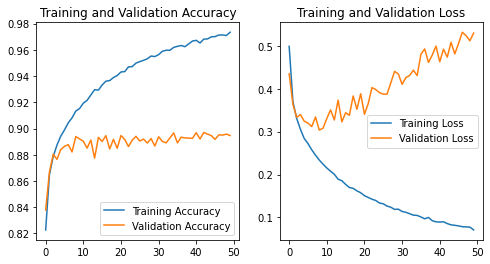

In [27]:
epochs =50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc=0)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.show()

In [28]:
# Early Stopping

In [29]:
model_new = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10,'softmax')
])

In [30]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_new.compile(optimizer='adam',
                 loss="sparse_categorical_crossentropy",
                 metrics=['accuracy'])

In [32]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [33]:
history = model_new.fit(train_images, train_labels, epochs=50, validation_split=0.2,callbacks=callback,verbose=1)

Epoch 1/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4894 - accuracy: 0.8255 - val_loss: 0.3997 - val_accuracy: 0.8572
Epoch 2/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3659 - accuracy: 0.8648 - val_loss: 0.3671 - val_accuracy: 0.8696
Epoch 3/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3290 - accuracy: 0.8796 - val_loss: 0.3398 - val_accuracy: 0.8802
Epoch 4/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3034 - accuracy: 0.8877 - val_loss: 0.3600 - val_accuracy: 0.8703
Epoch 5/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2848 - accuracy: 0.8946 - val_loss: 0.3286 - val_accuracy: 0.8777
Epoch 6/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2694 - accuracy: 0.8979 - val_loss: 0.3316 - val_accuracy: 0.8802
Epoch 7/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2548 - accuracy: 0.9043 - val_loss: 0.3212 - val_ac

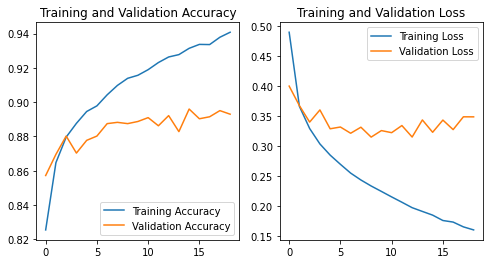

In [34]:
epochs = 19
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc=0)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.show()